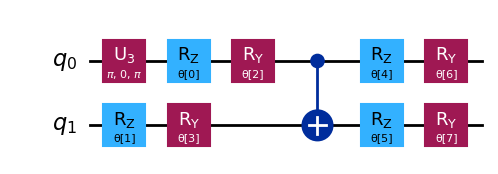

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
import numpy as np

theta_list = (2 * np.pi * np.random.rand(1, 8)).tolist()
observable = SparsePauliOp.from_list([("XX", 1), ("YY", -3)])

reference_circuit = QuantumCircuit(2)
reference_circuit.x(0)

variational_form = TwoLocal(
    2,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
)
ansatz = reference_circuit.compose(variational_form)

ansatz.decompose().draw('mpl')

In [2]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, hamiltonian, params)
    cost = estimator.run([pub]).result()[0].data.evs
    return cost

In [3]:
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()

In [4]:
# SciPy minimizer routine
from scipy.optimize import minimize

x0 = np.ones(8)

result = minimize(cost_func_vqe, x0, args=(ansatz, observable, estimator), method="SLSQP")

result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.99999999645274
       x: [ 1.000e+00  1.000e+00 -1.571e+00 -4.556e-05 -1.207e+00
           -1.935e+00  4.079e-01 -4.079e-01]
     nit: 12
     jac: [ 1.192e-07  2.980e-08 -7.959e-04  2.543e-04  1.381e-03
            1.381e-03  5.431e-04  5.431e-04]
    nfev: 112
    njev: 12

In [5]:
# SciPy minimizer routine
from scipy.optimize import minimize

x0 = np.ones(8)

result = minimize(cost_func_vqe, x0, args=(ansatz, observable, estimator), method="BFGS")

result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -3.999999999999782
        x: [ 1.000e+00  1.000e+00  1.571e+00  2.785e-07  2.009e-01
            -2.009e-01  6.342e-01 -6.342e-01]
      nit: 14
      jac: [ 5.960e-08 -2.980e-08  8.941e-07  1.013e-06  2.086e-07
             1.490e-07  5.960e-08  5.960e-08]
 hess_inv: [[ 1.000e+00 -2.999e-08 ... -7.780e-05 -6.011e-05]
            [-2.999e-08  1.000e+00 ... -3.475e-06 -7.574e-07]
            ...
            [-7.780e-05 -3.475e-06 ...  7.242e-01 -2.603e-01]
            [-6.011e-05 -7.574e-07 ... -2.603e-01  8.180e-01]]
     nfev: 144
     njev: 16

In [6]:

# SciPy minimizer routine
from scipy.optimize import minimize

x0 = np.ones(8)

result = minimize(cost_func_vqe, x0, args=(ansatz, observable, estimator), method="COBYLA")

result

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.9999999832448676
       x: [ 1.687e+00  1.250e+00  1.571e+00  3.142e+00  1.469e+00
           -1.672e+00  1.556e+00  1.585e+00]
    nfev: 126
   maxcv: 0.0